In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve , roc_auc_score

df = pd.read_csv('./datasets/pima_diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

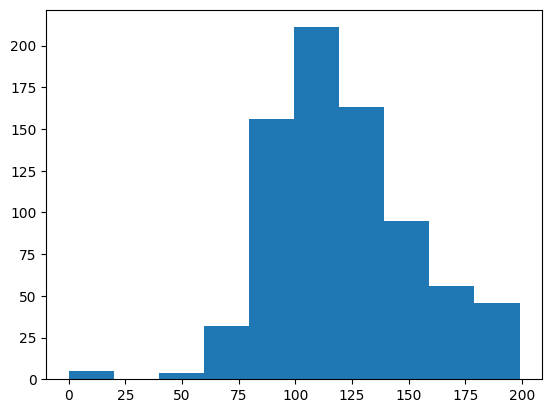

In [107]:
plt.hist(df['Glucose'] , bins=10)

(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <BarContainer object of 10 artists>)

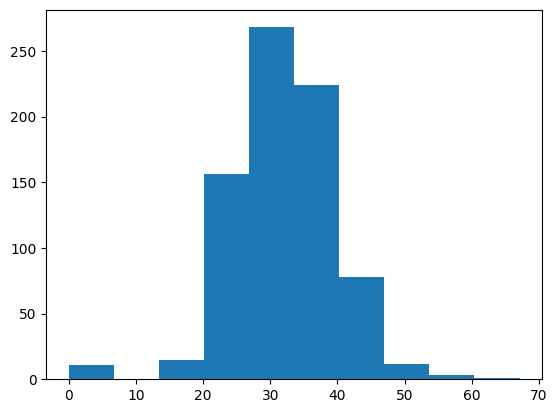

In [108]:
plt.hist(df['BMI'] , bins=10)

In [109]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI']]
y= df['Outcome']


In [110]:
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [111]:

scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [112]:
X_df = pd.DataFrame(X , columns=['Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI'])


In [113]:

dt = DecisionTreeClassifier(max_depth=5, min_samples_split=3 , random_state=42)
dt.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=3, random_state=42)

In [114]:
scaler  = StandardScaler()
X_test = scaler.fit_transform(X_test)


In [120]:
dt_pred_proba = dt.predict_proba(X_test)
dt_pred_proba_1 = dt.predict_proba(X_test)

In [116]:

fpr , tpr , threshosd = roc_curve(y_test ,dt_pred_proba[: , 1] )

In [117]:

dt = DecisionTreeClassifier(max_depth=7 , random_state=42)
dt.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [125]:
from sklearn.tree import export_text
r = export_text(dt, feature_names=['Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI'])
print(r)

|--- Glucose <= 0.71
|   |--- BMI <= -0.41
|   |   |--- Glucose <= -0.50
|   |   |   |--- class: 0
|   |   |--- Glucose >  -0.50
|   |   |   |--- BMI <= -0.74
|   |   |   |   |--- Glucose <= 0.12
|   |   |   |   |   |--- Glucose <= -0.41
|   |   |   |   |   |   |--- BloodPressure <= -0.25
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- BloodPressure >  -0.25
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Glucose >  -0.41
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Glucose >  0.12
|   |   |   |   |   |--- BloodPressure <= -0.65
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- BloodPressure >  -0.65
|   |   |   |   |   |   |--- BMI <= -2.81
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- BMI >  -2.81
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |--- BMI >  -0.74
|   |   |   |   |--- Glucose <= -0.44
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Glucose >  -0.44
|   |   |   |  

In [126]:
dt.feature_importances_

array([0.55596024, 0.13605237, 0.02557231, 0.07489539, 0.2075197 ])

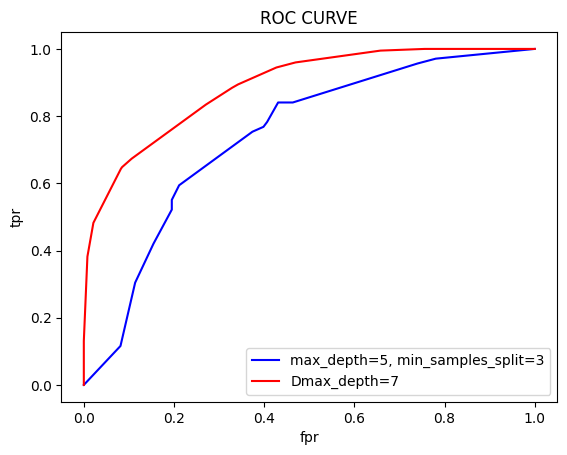

In [118]:
import matplotlib.pyplot as plt

plt.title("ROC CURVE")

plt.xlabel("fpr")
plt.ylabel("tpr")

plt.plot(fpr, tpr , "b", label = "max_depth=5, min_samples_split=3" )
plt.plot(fpr_1, tpr_1 , "r", label = "Dmax_depth=7" )

plt.legend(loc = "lower right")

plt.show()

In [121]:
auc_1 = roc_auc_score(y_test , dt_pred_proba[: , 1])
auc_2 = roc_auc_score(y_test , dt_pred_proba_1[: , 1])

In [122]:

auc_1

0.6767998114763756

In [123]:
auc_2

0.6767998114763756